# Simulación de escenarios futuros
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="200px" />

* Veremos un caso de aplicación de simulación montecarlo en la toma de decisiones.
* Python Data Analysis Library: `pandas` es una librería de código abierto, fácil de usar y que provee alto rendimiento en structuras de datos y herramientas de análisis de datos para el lenguaje de programación Python.

**Referencias:**
- http://pandas.pydata.org/
- https://www.learndatasci.com/best-data-science-online-courses/
- https://www.datacamp.com/community/tutorials/python-excel-tutorial
## Modelos extraídos de datos históricos
La fuente de datos es variada y depende de la aplicación y de la disiplina a estudiar. Alguna de las páginas que ofrecen datos para su análisis son:
* [Servición Simológico Nacional](http://www2.ssn.unam.mx:8080/catalogo/)
* [Precios de acciones, monedas e índices financieros](https://finance.yahoo.com/)
* [Temperaturas](https://climatereanalyzer.org/clim/t2_daily/)
* [Muchos, muchos datos](https://data.worldbank.org/)

# Ejemplo de temperaturas

Los siguientes datos son extraídas de la estación climática Copernicus C3S. Son temperaturas interpoladas usando modelos físicos de los trópicos desde 1940 a la fecha:

* **Lectura de archivos json**

In [3]:
import numpy as np
import pandas as pd

In [4]:
data_link='https://climatereanalyzer.org/clim/t2_daily/json/era5_tropics_t2_day.json'
# Más datos en:
# https://climatereanalyzer.org/clim/t2_daily/?dm_id=world
data=pd.read_json(data_link)
Nyears=85 # 2024-2940
last=366-pd.DataFrame(data.data[Nyears]).isna().sum()[0]
fecha=pd.concat([pd.date_range('1940-01-01','2024-12-31').to_series(),pd.date_range('2025-01-01',periods=last).to_series()])
datos=np.concatenate([i for i in data.iloc[:-3,-1]])
df_temps=pd.DataFrame(datos).dropna()
df_temps.index=fecha
df_temps.columns=['data']
df_temps

,data
1940-01-01,24.266
1940-01-02,24.327
1940-01-03,24.297
1940-01-04,24.308
1940-01-05,24.28
...,...
2025-10-12,25.589
2025-10-13,25.577
2025-10-14,25.561
2025-10-15,25.649


**Analicemos el conjunto de temperaturas para averiguar la probabilidad de que la temperatura baje un 0.5% en un mes.**

1. ¿Los datos tienen media constante?

<Axes: >

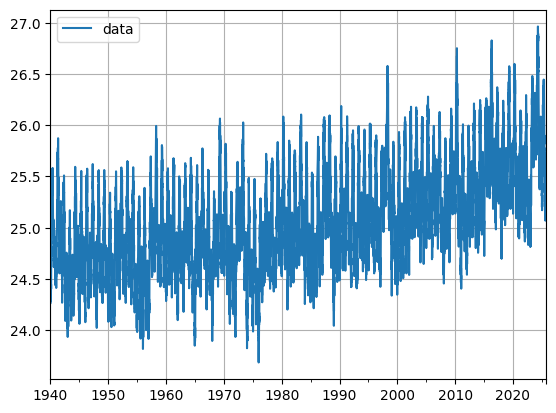

In [7]:
df_temps.plot(grid=True)

<Axes: >

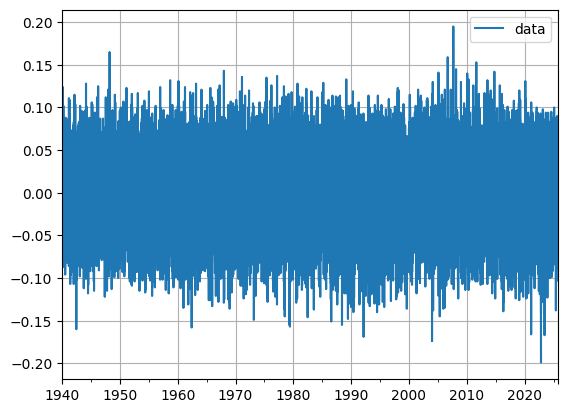

In [8]:
# La media a lo largo del tiempo no es constante. Analicemos los incrementos de temperatura
df_temps.diff().plot(grid=True)

In [9]:
# La diferencia de temperaturas sí mantiene la media a lo largo del time
delta=df_temps.diff().dropna() # El primer elemento es NaN. Lo eliminamos
delta

,data
1940-01-02,0.061
1940-01-03,-0.03
1940-01-04,0.011
1940-01-05,-0.028
1940-01-06,-0.012
...,...
2025-10-12,-0.016
2025-10-13,-0.012
2025-10-14,-0.016
2025-10-15,0.088


2. ¿Los datos tienen distribución Normal?

<Axes: ylabel='Frequency'>

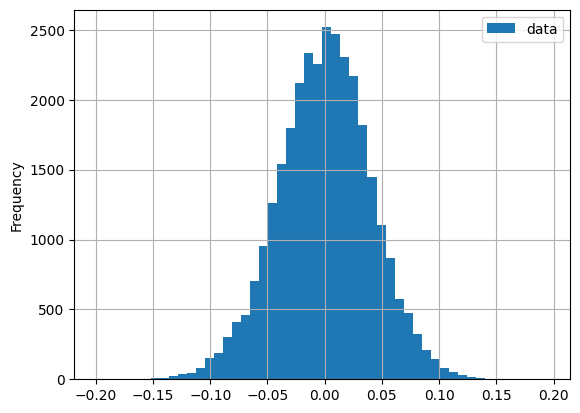

In [13]:
delta['data']=delta['data'].astype('float')
delta.plot(kind='hist',bins=50,grid=True)   # shí

3. Generamos 10000 números aleatorios con la media y std para un mes

In [15]:
# Lo que simularemos será el delta de temperaturas
delta_sim=np.random.normal(delta.mean(),delta.std(),(30,10000))
delta_sim[:2,:10]

array([[ 0.03342474, -0.0013765 ,  0.02188483,  0.05441475,  0.00116306,
         0.06374786, -0.05178482, -0.06045172, -0.04394315,  0.03650251],
       [-0.05160642,  0.05659741,  0.03657608,  0.03864601, -0.05565171,
         0.00096644, -0.0076993 , -0.05471741,  0.00464999,  0.06185677]])

In [19]:
df_temps.index[-1] # último día conocido

Timestamp('2025-10-16 00:00:00')

In [22]:
delta_sim.shape

(30, 10000)

In [23]:
# Le asignamos los días a cada escenario
dias=pd.date_range('2025-10-17',periods=delta_sim.shape[0])
dias

DatetimeIndex(['2025-10-17', '2025-10-18', '2025-10-19', '2025-10-20',
               '2025-10-21', '2025-10-22', '2025-10-23', '2025-10-24',
               '2025-10-25', '2025-10-26', '2025-10-27', '2025-10-28',
               '2025-10-29', '2025-10-30', '2025-10-31', '2025-11-01',
               '2025-11-02', '2025-11-03', '2025-11-04', '2025-11-05',
               '2025-11-06', '2025-11-07', '2025-11-08', '2025-11-09',
               '2025-11-10', '2025-11-11', '2025-11-12', '2025-11-13',
               '2025-11-14', '2025-11-15'],
              dtype='datetime64[ns]', freq='D')

In [24]:
df_delta=pd.DataFrame(delta_sim,index=dias)
df_delta

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2025-10-17,0.033425,-0.001376,0.021885,0.054415,0.001163,0.063748,-0.051785,-0.060452,-0.043943,0.036503,...,0.060734,-0.028217,0.084520,-0.036436,0.030774,0.029756,-0.000758,-0.006735,0.000719,0.037906
2025-10-18,-0.051606,0.056597,0.036576,0.038646,-0.055652,0.000966,-0.007699,-0.054717,0.004650,0.061857,...,0.078801,0.006002,0.061540,0.050596,0.007543,0.004086,-0.014172,0.049539,0.016676,0.018846
2025-10-19,-0.119730,0.008884,0.003277,-0.049595,0.017756,0.002381,0.003202,-0.017660,-0.003421,-0.081552,...,-0.022449,0.044077,0.012896,0.054544,-0.020495,0.056116,0.070659,-0.008866,0.049806,-0.064547
2025-10-20,0.002243,0.005301,0.041296,-0.000229,-0.021796,0.084992,-0.023737,-0.038222,-0.042372,0.027952,...,-0.008922,-0.009350,0.022680,-0.047336,0.086316,0.022447,0.018047,0.003612,-0.028432,-0.005568
2025-10-21,-0.050385,0.003581,0.083948,-0.017910,0.070311,0.006484,-0.019825,-0.043169,-0.031369,-0.005669,...,-0.016595,-0.041253,0.002303,0.046941,0.075294,-0.000647,0.016841,0.013863,-0.025421,-0.037043
2025-10-22,0.030700,-0.017996,0.052801,-0.030634,0.030390,0.018089,0.006080,-0.100841,0.053422,-0.041772,...,0.042117,0.055665,0.050575,-0.033900,-0.074996,0.034632,-0.005245,0.007058,-0.061879,0.014002
2025-10-23,-0.011197,0.008730,-0.008338,-0.040141,0.043085,0.009942,0.000813,0.043240,0.041138,-0.013899,...,0.056566,-0.012665,0.051559,-0.013134,0.025754,0.082714,-0.024780,-0.030667,0.003254,0.014365
2025-10-24,0.082057,-0.033317,0.005250,-0.028177,-0.012227,-0.001796,-0.005181,-0.036985,0.015114,-0.033304,...,0.016086,0.042783,-0.007360,-0.045116,0.005527,-0.020539,-0.023741,-0.032318,0.039507,-0.048938
2025-10-25,-0.048778,0.044757,0.018843,0.061673,-0.059033,0.079738,0.034094,-0.001115,0.091409,0.018055,...,-0.082806,0.030837,-0.023228,0.041510,0.008482,0.012206,-0.025043,0.011234,-0.017449,0.015720
2025-10-26,-0.083368,0.013731,-0.016693,0.053765,-0.070483,0.090061,0.004591,0.043795,0.028513,0.014069,...,-0.021748,-0.016097,0.001846,0.008249,0.014279,-0.039965,0.053675,0.000017,0.023337,-0.057756


4. Calculemos la probabilidad de que la temperatura baje 0.5%

La $k$-ésima temperatura se calcula como
$$
T_k=T_0+\sum_{i=1}^k\Delta_i
$$

In [29]:
df_temps.iloc[-1].values[0] # último valor conocido (T_0)

25.682

In [31]:
temp_sim=df_temps.iloc[-1].values[0]+df_delta.cumsum()
temp_porcentual=temp_sim/df_temps.iloc[-1].values[0]
temp_porcentual.iloc[:2,:5]

,0,1,2,3,4
2025-10-17,1.001301,0.999946,1.000852,1.002119,1.000045
2025-10-18,0.999292,1.002150,1.002276,1.003624,0.997878


In [32]:
Porcentaje=np.mean(temp_porcentual<=0.995,axis=1)
Porcentaje.shape

(30,)

np.float64(0.2814)

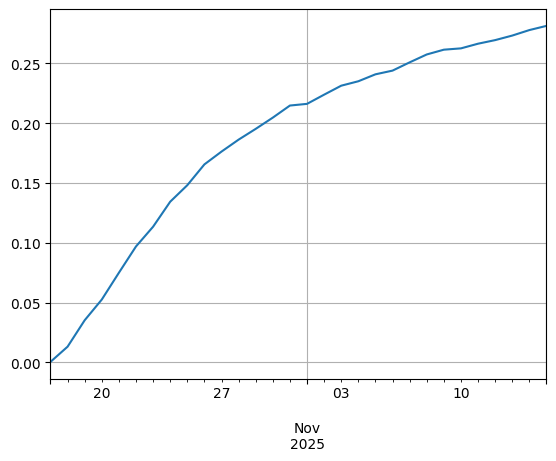

In [37]:
Porcentaje.plot(grid=True)
Porcentaje.iloc[-1]

Vemos que en un inicio la probabilidad es nula mientras aumenta hasta alcanzar el $28\%$ al final de la simulación.

---

# Ejemplo con datos de Yahoo finance
Ahora hacemos un análisis de proyección de presios con diferentes marcas.

Considere que esta proyección es más precisa conforme se aumenta el número de escenarios simulados, así como disminuye en función al número de días proyectados a futuro.

---
## Ejemplo de sismos
Cortesía de un proyecto de Ingeniería Civil del periodo V2024 :)

Extraemos y limpiamos los datos de los últimos 10 años de sismos en México

In [ ]:
# Importación de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd                            # Librería para definir entidades geométricas, útil para visualizar mapas
from sklearn.preprocessing import KBinsDiscretizer # Clase para agrupar variables como localidades

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# http://www2.ssn.unam.mx:8080/catalogo/
ruta='/'
archivo=''                                    # Acá va el nombre del archivo
df_sismos=pd.read_csv(ruta+archivo,header=4)  # Omitimos la descripción del archivo de las primeras columnas
# df_sismos.head()
df_sismos.drop(columns=['Hora','Referencia de localizacion','Fecha UTC','Hora UTC','Estatus'],inplace=True)

<ipython-input-3-c081efe686b8>:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sismos=pd.read_csv(ruta+archivo,header=4)  # Omitimos la descripción del archivo de las primeras columnas


In [ ]:
# Eliminamos datos no numéricos
df_sismos['Magnitud']=df_sismos['Magnitud'].replace('no calculable',np.nan)
df_sismos['Magnitud']=df_sismos['Magnitud'].astype('float')
df_sismos.dropna(inplace=True)

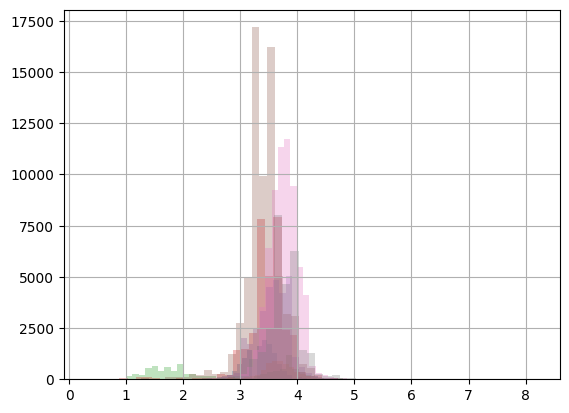

In [ ]:
# Creamos una nueva variable llamada 'Posicion' resultado de agrupar los sismos más cercano entre sí
#
disc=KBinsDiscretizer(n_bins=8,encode='ordinal',strategy='kmeans')   # Hacemos 8 grupos enumerados de 0 a 7
df_sismos['Posicion']=disc.fit_transform(df_sismos[['Longitud']])
# Cada 'Posicion' tiene asociados varios sismos
H=df_sismos.groupby('Posicion')['Magnitud'].hist(alpha=0.3,bins=50)

Text(33.972222222222214, 0.5, 'Latitud')

<Figure size 640x480 with 0 Axes>

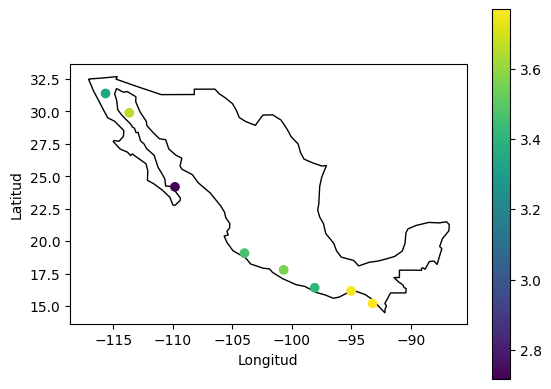

In [ ]:
# Graficamos los datos obtenidos
#
# Coordenadas de cada 'Posicion'
lon=df_sismos.groupby('Posicion')['Longitud'].mean()
lat=df_sismos.groupby('Posicion')['Latitud'].mean()
# Mapa de México
# https://www.naturalearthdata.com/downloads/110m-cultural-vectors/
file_shp=ruta+'ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'
world=gpd.read_file(file_shp)
mexico=world[world.ABBREV=='Mex.']
#
# Visualización de los resultados
fig=plt.figure()
mexico.plot(color='white', edgecolor='black')
#
# Historico de sismos
plt.scatter(lon,lat,c=df_sismos.groupby('Posicion')['Magnitud'].mean())
plt.colorbar()
#
# Etiquetas ;)
plt.xlabel('Longitud')
plt.ylabel('Latitud')

In [ ]:
df_sismos.head()

,Fecha,Magnitud,Latitud,Longitud,Profundidad,Posicion
0,2014-10-20,3.2,14.7765,-92.5707,101.8,7.0
1,2014-10-20,3.7,14.5507,-92.5552,78.3,7.0
2,2014-10-20,3.2,14.4478,-92.6617,41.5,7.0
3,2014-10-20,3.4,14.4765,-92.0598,74.0,7.0
4,2014-10-20,3.2,14.8213,-92.5308,77.3,7.0


### Análisis de datos
Cada variable extraída tiene atributos estadísticos intrínsecos que podemos medir de los históricos. Si la variable conserva estos atributos a lo largo del tiempo, podemos suponer que dicho comportamiento se mantendrá en los escenarios futuros.

La literatura indica que son suficientes tres características para hacer predicción: media aritmética, desviación estándar y tendencia. Esto último es la pendiente de una regresión lineal usando al tiempo como variable independiente.

**Buscamos entonces, una tendencia cero (la variable no crece ni decrece), así la media aritmética se mantiene**

In [ ]:
# Para la variable 'Magnitud', ¿podemos suponer que la media y la desviación estándar se mantienen a lo largo del tiempo?


In [ ]:
# Extraemos la media y desviación estándar para cada agrupación de la 'Magnitud'


### Creación del modelo estocástico

In [ ]:
# El modelo consiste en dos partes:
# 1. La elección de la posición y
# 2. El cálculo de la magnitud dependiente de la posición
#


## Simulación Montecarlo
Debido a que el modelo supone que se mantienen los atributos estadísticos a lo largo del tiempo, la simulación tien las siguientes limitantes
* El periodo simulado inmediato a los históricos es más preciso
* El estudio de estas simulaciones evalúa la cantidad de escenarios de satisfacen una condición y no el comportamiento general del modelo real, ya que éste corresponde al promedio calculado a priori.